### Prompt Chaining Workflow using LangGraph

In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict

In [3]:
# Defining the LLM Model using Ollama (Using the gpt oss 120b cloud model)
llm_model = ChatOllama(model='gpt-oss:20b-cloud')

In [22]:
# Creating a state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    blog_score: int

In [23]:
def create_outline(state: BlogState) -> BlogState:
    """
    Function to extract title from the state,
    Call the LLM to generate an outline for the title,
    Update the state with the generated outline
    """

    # Fetch the title
    title = state['title']

    # Prompt for generating outline based on title
    prompt = f'Create a detailed outline for a blog based on the given title: {title}'

    # Calling the llm to generate outline
    outline = llm_model.invoke(prompt).content

    # Updating the state with the generated outline
    state['outline'] = outline

    return state

In [24]:
def create_blog(state: BlogState) -> BlogState:
    """
    Function to extract title and outline from the state,
    Call the LLM to generate a content based on the title and outline,
    Update the state with the generated content
    """

    # Fetch the title and outline
    title = state['title']
    outline = state['outline']

    # Prompt for generating outline based on title
    prompt = f'Generate detailed content for a blog with the title: {title}, and outline: {outline}'

    # Calling the llm to generate outline
    content = llm_model.invoke(prompt).content

    # Updating the state with the generated outline
    state['content'] = content

    return state

In [27]:
def evaluate_blog(state: BlogState) -> BlogState:
    """
    Function to extract content and outline from the state,
    Call the LLM to generate a score based on the content and outline,
    Update the state with the generated evaluation score
    """

    # Fetch the title and outline
    outline = state['outline']
    content = state['content']

    # Prompt for generating outline based on title
    prompt = f'Based on the provided blog outline and blog content, evaluate and rate my blog on a scale of 1-10, {outline}, {content}'

    # Calling the llm to generate outline
    blog_score = llm_model.invoke(prompt).content

    # Updating the state with the generated outline
    state['blog_score'] = blog_score

    return state

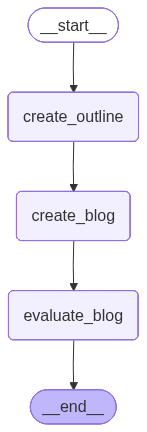

In [28]:
# Creating a graph
graph = StateGraph(BlogState)

# Adding nodes to the graph
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# Adding edges to the graph
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

# Compiling the graph
workflow = graph.compile()
workflow

In [29]:
initial_state = {"title" : "Generative AI"}

final_state = workflow.invoke(initial_state)
final_state

{'title': 'Generative AI',
 'outline': '## Blog Outline  \n**Title:** *Generative AI – From Groundbreaking Theory to Everyday Impact*\n\n| Section | Sub‑sections | Key Talking Points | Suggested Word Count |\n|---------|--------------|--------------------|----------------------|\n| 1. Introduction |  | • Hook: “What if your computer could write a novel, design a car, or even compose music? That’s Generative AI.” <br>• Define the scope of the blog: explaining what generative AI is, its evolution, applications, challenges, and the road ahead. <br>• Preview of sections. | 150–200 |\n| 2. From Concept to Reality | 2.1 Early Foundations <br>2.2 Birth of Generative Models <br>2.3 The Rise of Deep Learning | • Informal “ATGPT” analogy: earliest statistical models → first neural nets → modern deep learning <br>• 1990s: Markov chains, n‑gram models. <br>• 2000‑2010: Autoencoders, Restricted Boltzmann Machines. <br>• 2014‑present: Generative Adversarial Networks (GANs) and Variational Autoencode

In [30]:
print(final_state['outline'])

## Blog Outline  
**Title:** *Generative AI – From Groundbreaking Theory to Everyday Impact*

| Section | Sub‑sections | Key Talking Points | Suggested Word Count |
|---------|--------------|--------------------|----------------------|
| 1. Introduction |  | • Hook: “What if your computer could write a novel, design a car, or even compose music? That’s Generative AI.” <br>• Define the scope of the blog: explaining what generative AI is, its evolution, applications, challenges, and the road ahead. <br>• Preview of sections. | 150–200 |
| 2. From Concept to Reality | 2.1 Early Foundations <br>2.2 Birth of Generative Models <br>2.3 The Rise of Deep Learning | • Informal “ATGPT” analogy: earliest statistical models → first neural nets → modern deep learning <br>• 1990s: Markov chains, n‑gram models. <br>• 2000‑2010: Autoencoders, Restricted Boltzmann Machines. <br>• 2014‑present: Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs); 2018‑2022: Transformer‑based langua

In [31]:
print(final_state['content'])

# Generative AI – From Groundbreaking Theory to Everyday Impact  

---

## 1. Introduction  
*“What if your computer could write a novel, design a car, or even compose orchestral music? That’s Generative AI.”*  

Generative AI is the class of machine‑learning models that **create** new data—text, images, sound, code, and more—rather than just classifying or predicting it. Over the past decade it has moved from esoteric research to tools that can be dropped into a marketer’s workflow, a healthcare engineer’s lab notebook, or a student’s creative portfolio.  

In this post we’ll trace its evolution from rudimentary statistical tricks to the sophisticated multimodal systems of today, demystify the core tech under the hood, showcase the breadth of real‑world use cases, quantify the benefits, confront the risks, and finally give you a step‑by‑step playbook for bringing generative AI into your own organization.  

---

## 2. From Concept to Reality  

### 2.1 Early Foundations  
* **1970s–19

In [32]:
print(final_state['blog_score'])

**Overall rating: 8 / 10**

---

## What the post nails

| Dimension | Strengths |
|-----------|----------|
| **Scope coverage** | Every outline section appears in the draft, from evolution to use‑cases to a playbook and future outlook. |
| **Structure & flow** | The “outline narrative flow” is preserved (hook → context → deep dive → utility → pros/cons → playbook → future.) Sections are clearly headed and organized chronologically. |
| **Depth of technical detail** | Core models (GAN, VAE, Transformer) are explained with as much clarity as a non‑expert can understand, and key trade‑offs are highlighted. |
| **Real‑world bearings** | You tie the tech to concrete examples (Jukebox, DALL‑E, GitHub Copilot, drug‑discovery ML) and deliver metrics that illustrate value. |
| **Risk awareness** | Ethical concerns are addressed with case studies and references to policy initiatives (EU AI Act, US standards). |
| **Actionability** | The playbook section gives a step‑by‑step path and the “Resour